In [30]:
#Description: Predict the numbers

In [31]:
#Import the libraries
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 0)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
#Get the data  
pd.read_csv('test2.csv')

,t,s,top
0,112,39,0.480736
1,9,1,0.573823
2,28,19,0.861700
3,49,21,0.622920
4,3553,1923,0.564582
...,...,...,...
999995,47297,46221,0.979097
999996,51,20,0.585775
999997,1990,35,0.027962
999998,448,34,0.118803


In [33]:
df_test2 = pd.read_csv('test2.csv')
df_test2

,t,s,top
0,112,39,0.480736
1,9,1,0.573823
2,28,19,0.861700
3,49,21,0.622920
4,3553,1923,0.564582
...,...,...,...
999995,47297,46221,0.979097
999996,51,20,0.585775
999997,1990,35,0.027962
999998,448,34,0.118803


In [34]:
df_test2.iloc[5:10, 0:3]

,t,s,top
5,357687,274669,0.769879
6,18620,10109,0.553138
7,4505,2135,0.494828
8,41,32,0.907501
9,520361,160276,0.309809


In [35]:
df_test2.value_counts()

t       s       top     
1       1       1.000000    5880
        0       0.887380    5841
2       1       0.946531    4849
3       1       0.872987    2879
        2       0.964903    2858
                            ... 
4169    3474    0.848865       1
        3756    0.913177       1
        4057    0.979322       1
        4126    0.993246       1
999719  309572  0.310959       1
Length: 655093, dtype: int64

In [36]:
df_test2.t.describe()

count    1000000.000000
mean       55957.820040
std       139746.898368
min            1.000000
25%           72.000000
50%         1456.500000
75%        27646.000000
max       999719.000000
Name: t, dtype: float64

<AxesSubplot:>

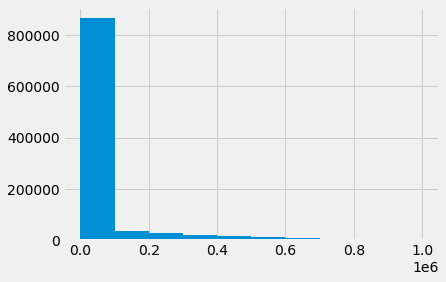

In [37]:
#Visualize t
df_test2.t.hist()

In [38]:
df_test2.s.describe()

count    1000000.000000
mean       27945.814923
std        82180.388217
min            0.000000
25%           29.000000
50%          501.000000
75%        10020.000000
max       988697.000000
Name: s, dtype: float64

<AxesSubplot:>

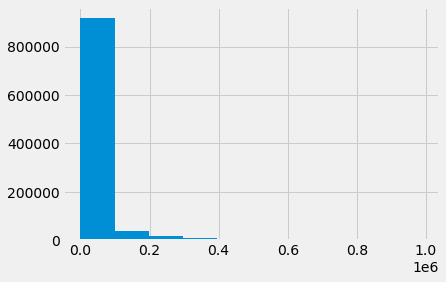

In [39]:
#Visualize s
df_test2.s.hist()

In [40]:
df_test2.top.describe()

count    1000000.000000
mean           0.583325
std            0.289023
min            0.000032
25%            0.344477
50%            0.612787
75%            0.843794
max            1.000000
Name: top, dtype: float64

<AxesSubplot:>

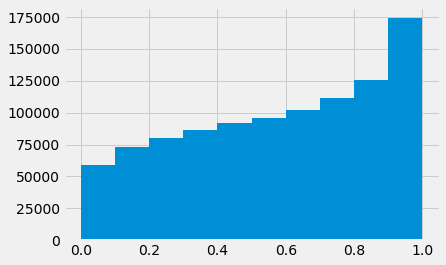

In [41]:
#Visualize top
df_test2.top.hist()

In [42]:
#Create a variable for predicting 'n' numbers
projection = 1000
#Create a new column called prediction
df_test2['Prediction'] = df_test2[['top']].shift(-projection)
#Show the dataset
df_test2

,t,s,top,Prediction
0,112,39,0.480736,0.344620
1,9,1,0.573823,0.924381
2,28,19,0.861700,0.792315
3,49,21,0.622920,0.501892
4,3553,1923,0.564582,0.405937
...,...,...,...,...
999995,47297,46221,0.979097,NaN
999996,51,20,0.585775,NaN
999997,1990,35,0.027962,NaN
999998,448,34,0.118803,NaN


In [43]:
#Create the independent dataset (X)
X = np.array(df_test2[['t', 's']])
#Remove the last 1000 rows
X = X[: -projection]
print(X)

[[112  39]
 [  9   1]
 [ 28  19]
 ...
 [ 37  23]
 [ 48  17]
 [  9   3]]


In [44]:
len(X)

999000

In [45]:
#Create the dependent dataset (y)
y = df_test2['top'].values
y = y[: -projection]
print(y)

[0.4807357  0.57382272 0.86170045 ... 0.80459978 0.55549523 0.74247704]


In [46]:
len(y)

999000

In [47]:
#Split the dataset into 85% training and 15% testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [48]:
len(X_train)

849150

In [49]:
len(X_test)

149850

In [50]:
df_X_test= pd.DataFrame(X_test, columns = ['t_test', 's_test'])
df_X_test

,t_test,s_test
0,8401,7412
1,44819,16265
2,16,7
3,26,18
4,363569,318672
...,...,...
149845,12120,7596
149846,24063,10693
149847,6036,4705
149848,26,8


In [51]:
df_y_test= pd.DataFrame(y_test, columns = ['top_test'])
df_y_test

,top_test
0,0.891790
1,0.369303
2,0.743830
3,0.874612
4,0.878034
...,...
149845,0.638979
149846,0.453384
149847,0.794099
149848,0.579448


In [52]:
#Create and train the model
linReg = LinearRegression()
#Train the model
linReg.fit(X_train, y_train)

LinearRegression()

In [53]:
#Test the model using score
linReg_confidence = linReg.score(X_test, y_test)
print('Linear regression Confidence:' , linReg_confidence)

Linear regression Confidence: 0.15218363104530075


X_projection = np.array(df_test2[['t', 's']])[-projection :]
print(X_projection)

In [54]:
linReg_prediction = linReg.predict(X_test)
print(linReg_prediction)

[0.60221342 0.57077134 0.59624092 ... 0.59900644 0.59622877 0.59628959]


In [55]:
df_linReg_prediction= pd.DataFrame(linReg_prediction, columns = ['LinReg'])
df_linReg_prediction

,LinReg
0,0.602213
1,0.570771
2,0.596241
3,0.596253
4,0.849291
...,...
149845,0.597230
149846,0.587396
149847,0.599006
149848,0.596229


In [56]:
len(linReg_prediction)

149850

In [57]:
res = pd.concat([df_X_test, df_y_test, df_linReg_prediction],axis=1)
res

,t_test,s_test,top_test,LinReg
0,8401,7412,0.891790,0.602213
1,44819,16265,0.369303,0.570771
2,16,7,0.743830,0.596241
3,26,18,0.874612,0.596253
4,363569,318672,0.878034,0.849291
...,...,...,...,...
149845,12120,7596,0.638979,0.597230
149846,24063,10693,0.453384,0.587396
149847,6036,4705,0.794099,0.599006
149848,26,8,0.579448,0.596229


In [58]:
#Ensemble methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [59]:
forest = RandomForestRegressor(n_estimators=10)
forest.fit(X_train, y_train)
forest_prediction = forest.predict(X_test)
mean_absolute_error(y_test, forest_prediction)

0.000599423870427995

In [60]:
print(forest_prediction)

[0.89125904 0.36921499 0.74382954 ... 0.79205873 0.57944765 0.7234304 ]


In [61]:
len(forest_prediction)

149850

In [62]:
df_forest_prediction= pd.DataFrame(forest_prediction, columns = ['forest'])
df_forest_prediction

,forest
0,0.891259
1,0.369215
2,0.743830
3,0.874612
4,0.881162
...,...
149845,0.635772
149846,0.451254
149847,0.792059
149848,0.579448


In [63]:
#Nearest Neighbors method
from sklearn.neighbors import KNeighborsRegressor

In [64]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
mae = mean_absolute_error(y_test, knn_prediction)
print(f"KNN mae = {mae}")

KNN mae = 0.0008091189714607065


In [65]:
print(knn_prediction)

[0.89057353 0.37062348 0.74382954 ... 0.79456813 0.57944765 0.72179856]


In [66]:
df_knn_prediction= pd.DataFrame(knn_prediction, columns = ['knn'])
df_knn_prediction

,knn
0,0.890574
1,0.370623
2,0.743830
3,0.874612
4,0.884226
...,...
149845,0.639263
149846,0.454097
149847,0.794568
149848,0.579448


In [67]:
#Neural network models
from sklearn.neural_network import MLPRegressor

scaler = Normalizer().fit(df_test2)
normalized_df_test2 = scaler.transform(df_test2)

print('До нормализации:')
print(df_test2[:3])
print()
print('После нормализации:')
normalized_df_test2[:3]

In [68]:
mlp = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=(10), activation='relu')
mlp.fit(X_train, y_train)
mlp_prediction = mlp.predict(X_test)
mae = mean_absolute_error(y_test, mlp_prediction)
print(f"MLP mae = {mae}")

MLP mae = 0.5061818502338755


mlp_prediction = scaler.inverse_transform(mlp_prediction)

In [69]:
print(mlp_prediction)

[0.61889642 0.34444083 0.76883117 ... 0.58285747 0.67063919 0.5473882 ]


In [70]:
df_mlp_prediction= pd.DataFrame(mlp_prediction, columns = ['mlp'])
df_mlp_prediction

,mlp
0,0.618896
1,0.344441
2,0.768831
3,0.715625
4,3.624368
...,...
149845,0.572678
149846,0.487567
149847,0.582857
149848,0.670639


In [71]:
res = pd.concat([df_X_test, df_y_test, df_linReg_prediction, df_forest_prediction, df_knn_prediction, df_mlp_prediction],axis=1)
res

,t_test,s_test,top_test,LinReg,forest,knn,mlp
0,8401,7412,0.891790,0.602213,0.891259,0.890574,0.618896
1,44819,16265,0.369303,0.570771,0.369215,0.370623,0.344441
2,16,7,0.743830,0.596241,0.743830,0.743830,0.768831
3,26,18,0.874612,0.596253,0.874612,0.874612,0.715625
4,363569,318672,0.878034,0.849291,0.881162,0.884226,3.624368
...,...,...,...,...,...,...,...
149845,12120,7596,0.638979,0.597230,0.635772,0.639263,0.572678
149846,24063,10693,0.453384,0.587396,0.451254,0.454097,0.487567
149847,6036,4705,0.794099,0.599006,0.792059,0.794568,0.582857
149848,26,8,0.579448,0.596229,0.579448,0.579448,0.670639


In [72]:
res.to_csv('result1000.csv',index=False)